# Mount Google Drive

This report documents my journey in the “Programming Languages for Data Analysis” course, focusing on the application of machine learning to COVID-19 data. my project adheres to the guidelines provided by our instructor and aims to unravel the complexities of the pandemic through data-driven analysis. This report highlights my methodologies, findings, and the impactful role of data analysis in public health research.
 
This exercise is written in the Google Colab environment, with data stored on Google Drive. Initially, access to Google Drive must be established, and the project path specified, to enable reading of the data from the drive

In [245]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/Projects/C3856'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Projects/C3856


# Import

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

# Read Data

In [247]:
df = pd.read_csv('data/daily_confirmed_cases.csv')

,Unnamed: 0,Province,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,...,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020
0,0,Anhui,1,8,6,24,21,10,36,46,...,0,0,0,0,0,0,0,0,0,0
1,1,Beijing,14,8,14,5,27,12,11,20,...,21,3,5,3,4,4,0,3,0,2
2,2,Chongqing,6,3,18,30,18,35,22,15,...,0,0,0,0,0,1,0,0,0,0
3,3,Fujian,1,4,5,8,17,24,21,4,...,5,4,6,3,6,1,2,3,2,0
4,4,Gansu,0,2,0,2,3,7,5,5,...,0,0,0,0,0,2,0,0,0,0
5,5,Guangdong,26,6,21,25,33,40,56,70,...,13,5,15,8,11,8,9,10,7,6
6,6,Guangxi,2,3,18,0,13,10,5,7,...,0,0,0,0,0,0,0,0,0,0
7,7,Guizhou,1,2,0,1,1,2,2,0,...,0,0,0,0,0,0,0,0,0,0
8,8,Hainan,4,1,3,11,3,11,7,3,...,0,0,0,0,0,0,0,0,0,0
9,9,Hebei,1,0,1,6,5,5,15,15,...,0,0,0,0,0,0,2,0,2,2


# 1) Data preparation
I first isolate data related to Beijing province. Then, consider data from every consecutive five days as input and the sixth day as output. I save this new dataset as 'Beijing_covid19_regression.csv', which will have 66 rows and 6 columns. Since the output column (y) is a continuous variable, a regression algorithm must be applied.

In [248]:
beijing_df = df[df['Province'] == 'Beijing'].drop(['Unnamed: 0', 'Province'], axis=1)

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020
1,14,8,14,5,27,12,11,20,3,25,...,21,3,5,3,4,4,0,3,0,2


In [249]:
# Assuming beijing_df is the dataframe with 1 row and 74 columns
beijing_reg_df = pd.DataFrame(columns=['x1', 'x2', 'x3', 'x4', 'x5', 'y'])

for i in range(0, len(beijing_df.columns) - 6):
    inputs = beijing_df.iloc[:, i:i+5].values.flatten()
    output = beijing_df.iloc[:, i+5].values[0]
    temp_df = pd.DataFrame({'x1': inputs[0], 'x2': inputs[1], 'x3': inputs[2], 'x4': inputs[3], 'x5': inputs[4], 'y': output}, index=[0])
    beijing_reg_df = pd.concat([beijing_reg_df, temp_df], ignore_index=True)


# Save the obtained dataframe into a CSV file
beijing_reg_df.to_csv('Beijing_covid19_regression.csv', index=False)
beijing_reg_df

,x1,x2,x3,x4,x5,y
0,14,8,14,5,27,12
1,8,14,5,27,12,11
2,14,5,27,12,11,20
3,5,27,12,11,20,3
4,27,12,11,20,3,25
...,...,...,...,...,...,...
61,15,21,3,5,3,4
62,21,3,5,3,4,4
63,3,5,3,4,4,0
64,5,3,4,4,0,3


# 2) Regression problem

## Q1

In [250]:
X = beijing_reg_df.drop(['y'], axis=1).to_numpy()
y = beijing_reg_df['y'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Q2

In [251]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

## Q3

In [252]:
error_rate = mean_squared_error(y_pred, y_test)
print(error_rate)

52.821550456466454


## Q4
Smaller alpha values yield better results. This is because Lasso regression uses an L1 regularization technique, which adds a penalty term to the cost function to penalize larger weights. When the regularization parameter alpha is too large, some coefficients are driven to zero, effectively removing the corresponding variables from the model. This overall reduction in weights decreases the accuracy of the regression.

In [253]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

y_pred = lasso_reg.predict(X_test)
error_rate = mean_squared_error(y_pred, y_test)
print(error_rate)

45.34541719212667


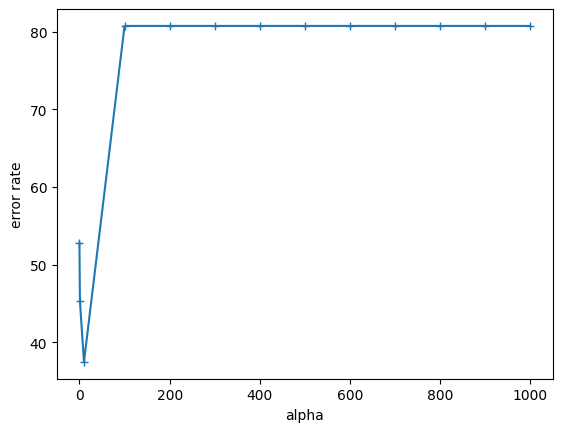

In [254]:
alphas = [0,1,10,100,200,300,400,500,600,700,800,900,1000]
error_rates = [None]*len(alphas)

for i, alpha in enumerate(alphas):
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)

    y_pred = lasso_reg.predict(X_test)
    error_rate = mean_squared_error(y_pred, y_test)
    error_rates[i] = error_rate

plt.plot(alphas, error_rates, marker='+')
plt.xlabel('alpha')
plt.ylabel('error rate')
plt.show()

# 3) Classification

In this stage, I add a new column named 'Label' to the dataset. If the number of COVID-19 cases increases on the sixth day compared to the fifth, the column value is set to 'goup'. If it decreases, it's set to 'godown', and if there's no change, it's labeled 'stable'. This data is saved in the file 'Beijing_covid19_classification.csv'. Then I train several Logistic Regression models with different values of C and penalty, display the accuracy of these models in a table and a chart, and compare them.

In [255]:
# 6th day is stored in column y and the 5th day is in x5
difference = beijing_reg_df['y'] - beijing_reg_df['x5']
beijing_clf_df = beijing_reg_df.drop(['y'], axis=1)

# Apply the condition to change the output
beijing_clf_df['Label'] = np.where(difference > 0, 'goup', np.where(difference < 0, 'godown', 'stable'))

beijing_clf_df.to_csv('Beijing_covid19_classification.csv')
beijing_clf_df

,x1,x2,x3,x4,x5,Label
0,14,8,14,5,27,godown
1,8,14,5,27,12,godown
2,14,5,27,12,11,goup
3,5,27,12,11,20,godown
4,27,12,11,20,3,goup
...,...,...,...,...,...,...
61,15,21,3,5,3,goup
62,21,3,5,3,4,stable
63,3,5,3,4,4,godown
64,5,3,4,4,0,goup


In [256]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(beijing_clf_df.drop(['Label'], axis=1), pd.factorize(beijing_clf_df['Label'])[0], test_size=0.3)

# Define the parameter grid
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}

results = []

# Loop through all combinations of penalty and C
for penalty in param_grid['penalty']:
    for C in param_grid['C']:
        model = LogisticRegression(penalty=penalty, C=C, solver='liblinear')
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        # Store the results in a dictionary
        results.append({'penalty': penalty, 'C': C, 'score': score})
results_df = pd.DataFrame(results)

In [257]:
results_df

,penalty,C,score
0,l1,0.001,0.70
1,l1,0.010,0.70
2,l1,0.100,0.65
3,l1,1.000,0.55
4,l1,10.000,0.55
5,l1,100.000,0.55
6,l2,0.001,0.65
7,l2,0.010,0.60
8,l2,0.100,0.55
9,l2,1.000,0.55


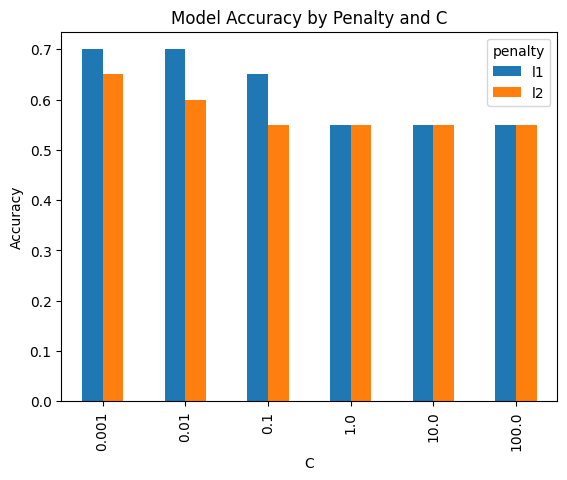

In [258]:
# Plot the results using pandas
results_df.pivot(index='C', columns='penalty', values='score').plot(kind='bar', title='Model Accuracy by Penalty and C')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

I trained different Logistic Regression models with various 'C' values and types of penalties. Then, I compared their accuracies using a table and a chart. The results showed that models with small 'C' values and L1 regularization had the highest accuracy. This means that using a small 'C' (which makes the model simpler and avoids overfitting) and L1 regularization (which helps select the most important features of the data) worked best for data.

# 4) Clustering
For clustering, first I read data on the coordinates of Chinese cities from a file and use the k-means algorithm to divide them into four clusters based on their geographical locations. Then I print the clusters and plot each province on a two-dimensional map, marking each cluster with a distinct color.
The algorithm effectively identifies cities close to each other and groups them into a cluster and then apply k-means clustering to COVID patient data and the clusters are as below:

## Cluster coordinates

In [259]:
coo_df = pd.read_csv('data/coordinates.csv', header=None)
coo_df.shape

(33, 3)

In [260]:
X_coo = coo_df[[1,2]].to_numpy()
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_coo)

coo_df['cluster'] = kmeans.labels_

In [261]:
# Group the provinces by cluster
clustered_provinces = coo_df.groupby('cluster')[0].apply(list)

# Print the province names for each cluster
for cluster, provinces in clustered_provinces.items():
    print(f'Cluster {cluster}: {", ".join(provinces)}')

Cluster 0: Anhui, Fujian, Guangdong, Guangxi, Hainan, Henan, Hong Kong, Hubei, Hunan, Jiangsu, Jiangxi, Macau, Shanghai, Zhejiang
Cluster 1: Chongqing, Gansu, Guizhou, Ningxia, Shaanxi, Sichuan, Yunnan
Cluster 2: Beijing, Hebei, Heilongjiang, Inner Mongolia, Jilin, Liaoning, Shandong, Shanxi, Tianjin
Cluster 3: Qinghai, Tibet, Xinjiang


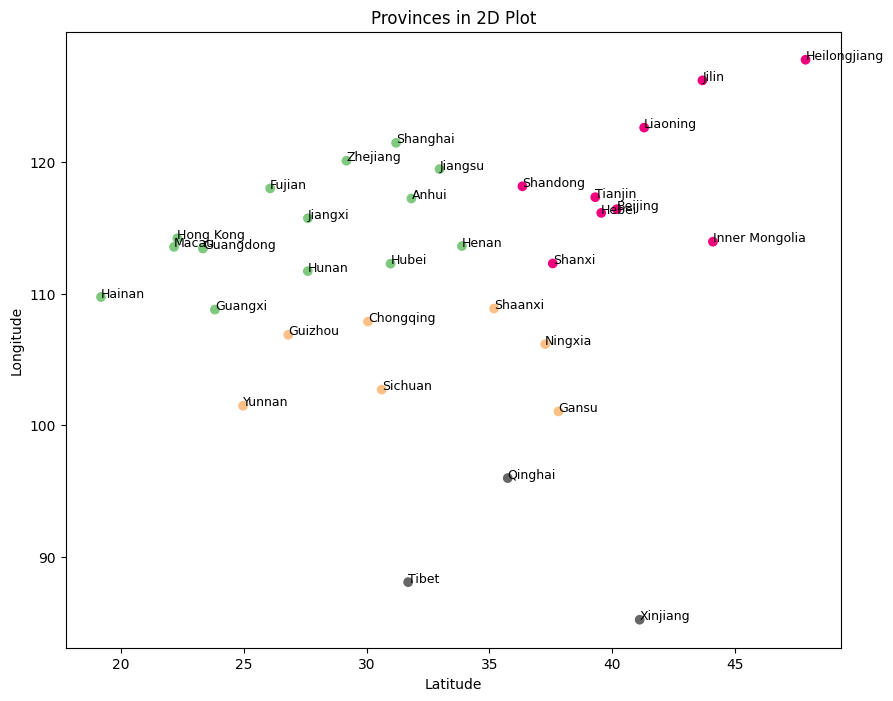

In [262]:
# Plotting the provinces in a 2D plot
plt.figure(figsize=(10, 8))
plt.scatter(coo_df[1], coo_df[2], marker='o', c=coo_df['cluster'], cmap='Accent')
plt.title('Provinces in 2D Plot')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Annotating the points with province names
for i, province in enumerate(coo_df[0]):
    plt.text(coo_df[1][i], coo_df[2][i], province, fontsize=9)

plt.show()

## Cluster Covid cases

I plot the geographical locations of the provinces again, but this time the color of each province is determined by its cluster in the COVID case-based clustering.
We observe that the number of COVID cases is not strongly correlated with geographical location. While many provinces in the largest cluster are geographically close, the other clusters are spread across the country. Therefore, it's likely that other factors such as transportation systems, population density, etc., have a significant impact on COVID case numbers, which may have been overlooked in this analysis.

In [263]:
cov_df = pd.read_csv('data/daily_confirmed_cases.csv')
X_cov = cov_df.drop(['Unnamed: 0',	'Province'], axis=1).to_numpy()[:,0].reshape(-1,1)

kmeans = KMeans(n_clusters=4).fit(X_cov)
kmeans.fit(X_cov)

cov_df['cluster'] = kmeans.labels_

# Group the provinces by cluster
clustered_provinces = cov_df.groupby('cluster')['Province'].apply(list)

# Print the province names for each cluster
for cluster, provinces in clustered_provinces.items():
    print(f'Cluster {cluster}: {", ".join(provinces)}')

Cluster 0: Anhui, Fujian, Gansu, Guangxi, Guizhou, Hainan, Hebei, Heilongjiang, Henan, Hong Kong, Hunan, Inner Mongolia, Jiangsu, Jiangxi, Jilin, Liaoning, Macau, Ningxia, Qinghai, Shaanxi, Shandong, Shanxi, Sichuan, Tianjin, Tibet, Xinjiang, Yunnan
Cluster 1: Hubei
Cluster 2: Guangdong
Cluster 3: Beijing, Chongqing, Shanghai, Zhejiang


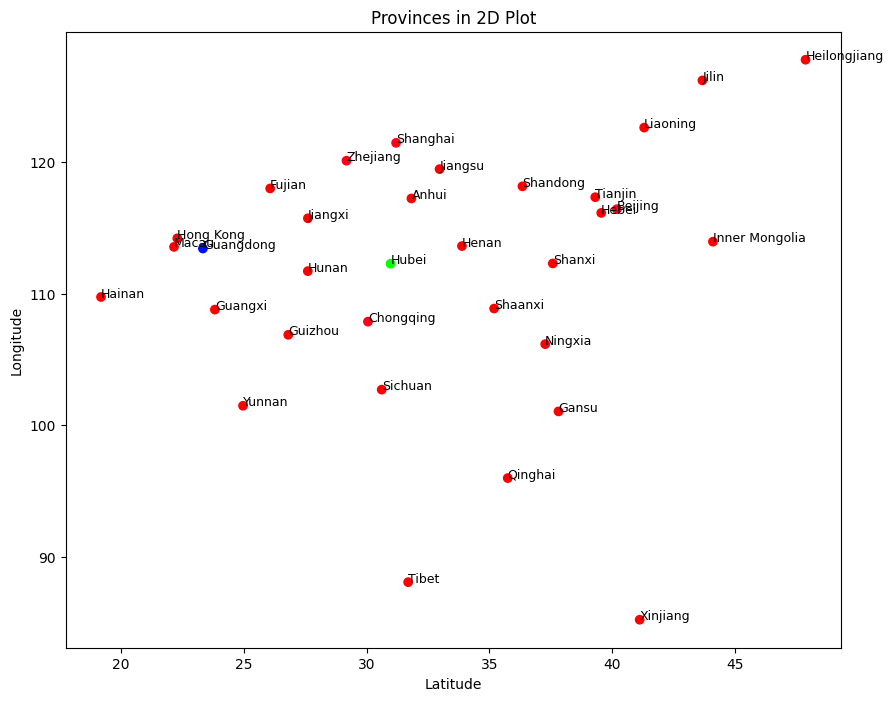

In [264]:
# Plotting the provinces in a 2D plot
plt.figure(figsize=(10, 8))
plt.scatter(coo_df[1], coo_df[2], marker='o', c=cov_df['cluster'], cmap='hsv')
plt.title('Provinces in 2D Plot')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Annotating the points with province names
for i, province in enumerate(coo_df[0]):
    plt.text(coo_df[1][i], coo_df[2][i], province, fontsize=9)

plt.show()